In [1]:
from pathlib import Path
import scipy.io.wavfile as wavfile
import matplotlib.pyplot as plt
import scipy.fft as fft
import numpy as np
import IPython
import pandas as pd

### Create paths

In [2]:
pwd = Path('.')

In [3]:
sounds = pwd / 'sounds'

In [4]:
ls sounds

combined.wav  doo.wav  do.wav  fa.wav  la.wav  mi.wav  re.wav  szo.wav  ti.wav


### Read in data

In [5]:
notes = ['do.wav', 'mi.wav', 'szo.wav', 'ti.wav', 'combined.wav']

In [6]:
signals = [wavfile.read(sounds/x) for x in notes]

In [7]:
len(signals), signals[0][:5]

(5, (44100, array([-21, -26, -29, ...,  -6,   4,  -3], dtype=int16)))

### Listen to audio (data)

In [8]:
IPython.display.Audio(sounds/notes[-1])

### Create dataframe

I chose to organize the data into a dataframe for easier indexing.

In [9]:
signals_df = df = pd.DataFrame(signals, columns= ['samplerate', 'signal'])

In [10]:
signals_df.head()

,samplerate,signal
0,44100,"[-21, -26, -29, -20, -18, -17, -11, -13, -1, -..."
1,44100,"[49, 41, 39, 20, 6, -7, -16, -21, -26, -30, -3..."
2,44100,"[8, 2, 0, 1, -3, 3, 2, 9, 0, 3, -5, -4, -10, -..."
3,44100,"[3, 6, 7, 11, 3, -4, -6, -6, -8, 6, 4, 19, 19,..."
4,44100,"[39, 23, 17, 10, -7, -30, -26, -38, -28, -30, ..."


In [11]:
signals_df.shape

(5, 2)

Shape of array containing first signal:

In [12]:
signals_df.signal[0].shape

(96255,)

### Visualize audio (data)

#### Create & transform data for visualization

In [13]:
def create_time(signal, samplerate):
    duration = signal.shape[0] / samplerate
    return np.arange(0, duration, 1/ samplerate)

In [14]:
signals_df['time'] = [create_time(s, signals_df.samplerate[0]) for s in signals_df.signal]

In [15]:
def create_length(signal, samplerate):
    return signal.shape[0] / samplerate

In [16]:
signals_df['length'] = [create_length(s, signals_df.samplerate[0]) for s in signals_df.signal]

In [17]:
def remove_wav(wav):
    return wav.replace(".wav", "")

In [18]:
signals_df['notes'] = list(map(remove_wav, notes))
signals_df

,samplerate,signal,time,length,notes
0,44100,"[-21, -26, -29, -20, -18, -17, -11, -13, -1, -...","[0.0, 2.2675736961451248e-05, 4.53514739229024...",2.182653,do
1,44100,"[49, 41, 39, 20, 6, -7, -16, -21, -26, -30, -3...","[0.0, 2.2675736961451248e-05, 4.53514739229024...",2.182653,mi
2,44100,"[8, 2, 0, 1, -3, 3, 2, 9, 0, 3, -5, -4, -10, -...","[0.0, 2.2675736961451248e-05, 4.53514739229024...",2.182653,szo
3,44100,"[3, 6, 7, 11, 3, -4, -6, -6, -8, 6, 4, 19, 19,...","[0.0, 2.2675736961451248e-05, 4.53514739229024...",2.182653,ti
4,44100,"[39, 23, 17, 10, -7, -30, -26, -38, -28, -30, ...","[0.0, 2.2675736961451248e-05, 4.53514739229024...",2.182653,combined


#### Single notes

In [19]:
cols = 2
rows = 2

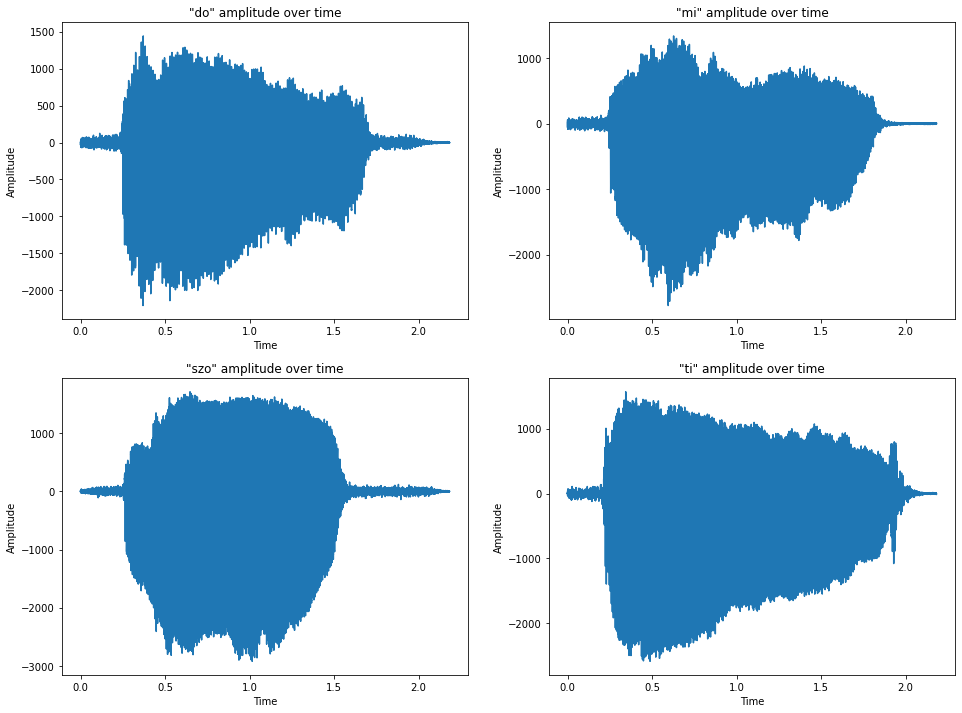

In [20]:
fig, axs = plt.subplots(rows, cols, figsize= (16, 12))

i = 0
for j in range(rows):
    for k in range(cols):
        axs[j][k].plot(signals_df.time[i], signals_df.signal[i])
        axs[j][k].title.set_text(f'"{signals_df.notes[i]}" amplitude over time')
        axs[j][k].set_xlabel('Time')
        axs[j][k].set_ylabel('Amplitude')
        i +=1
        
plt.show()

#### Combined note

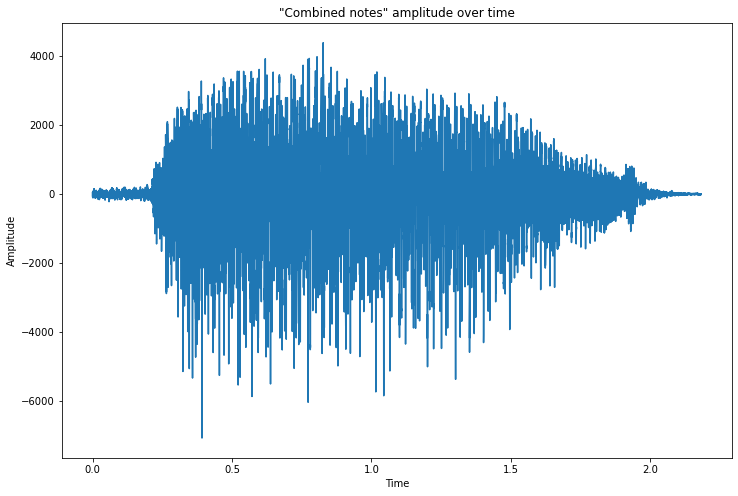

In [21]:
plt.figure(figsize= (12, 8))
plt.title('"Combined notes" amplitude over time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.plot(signals_df.time.iloc[-1], signals_df.signal.iloc[-1]);

#### Zoom in on 1 "single" note and on the "combined" note

"Single" note / sound

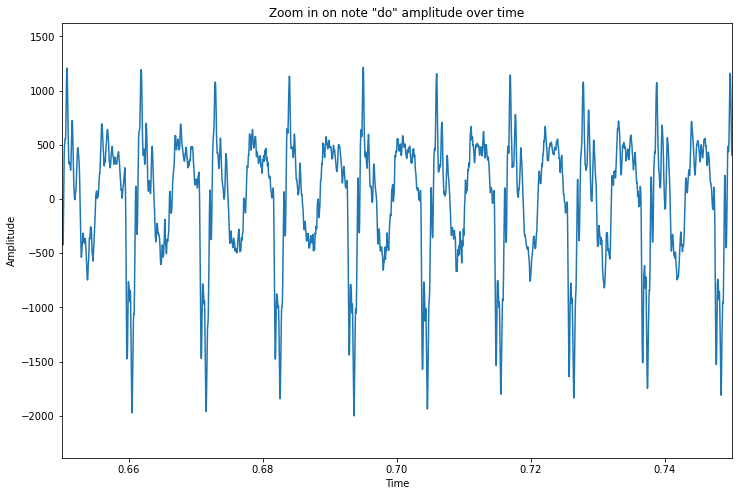

In [22]:
plt.figure(figsize= (12, 8))
plt.title('Zoom in on note "do" amplitude over time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim((0.65, 0.75))
plt.plot(signals_df.time[0], signals_df.signal.iloc[0]);

"Combined" note / sounds

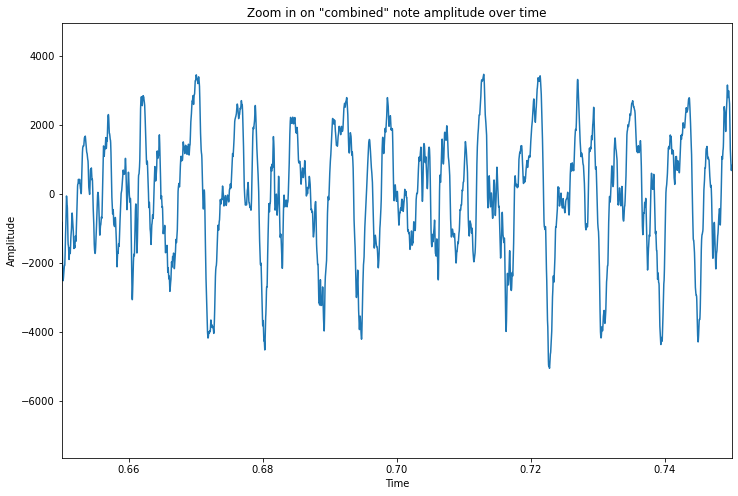

In [23]:
plt.figure(figsize= (12, 8))
plt.title('Zoom in on "combined" note amplitude over time')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.xlim((0.65, 0.75))
plt.plot(signals_df.time.iloc[-1], signals_df.signal.iloc[-1]);

### Apply Discrete Fourier Transform (DFT)

#### Using scipy's Fast Fourier Transform to compute the DFT

Combined notes

In [24]:
signal_combined_fft = fft.fft(signals_df.signal.iloc[-1])

In [25]:
signal_combined_fft[:5]

array([-100174.            -0.j        ,   10893.50974564 +4886.40791709j,
          7089.62406771-11075.12216891j,    3952.00573102 -5008.8096963j ,
          1480.72588907 -2403.05334765j])

Visualize DFT result (complex ndarray)

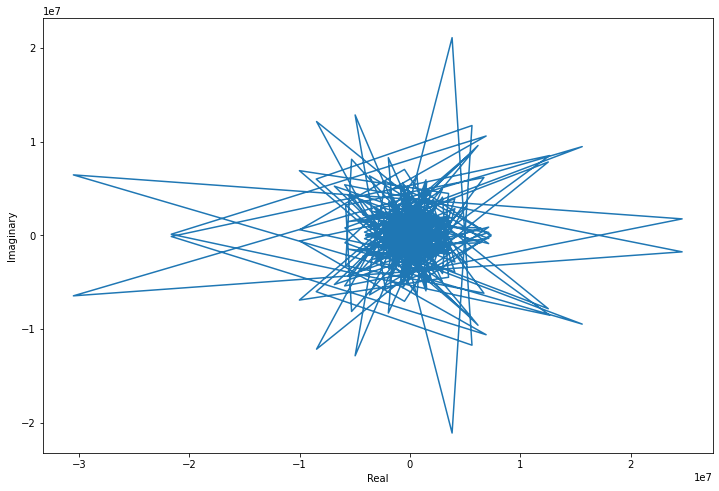

In [26]:
x = signal_combined_fft.real
y = signal_combined_fft.imag

plt.figure(figsize= (12, 8))
plt.xlabel('Real')
plt.ylabel('Imaginary')
plt.plot(x, y);

Visualize "combined sound" in terms of frequencies

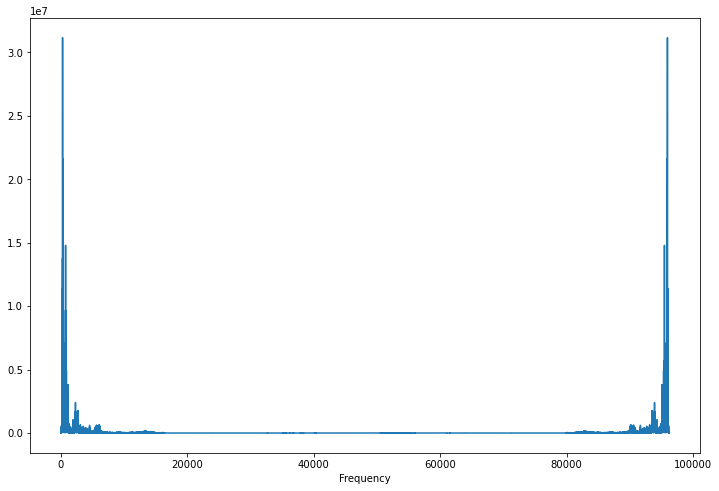

In [27]:
plt.figure(figsize= (12, 8))
plt.xlabel('Frequency')
plt.plot(np.abs(signal_combined_fft));

Zoom in on above graph

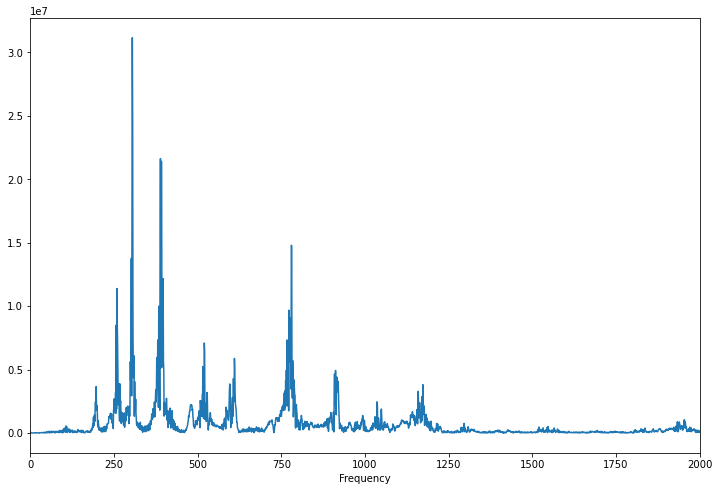

In [28]:
plt.figure(figsize= (12, 8))
plt.xlabel('Frequency')
plt.xlim((0, 2000))
plt.plot(np.abs(signal_combined_fft))
plt.savefig('plots/DFT_combined_lows.png');

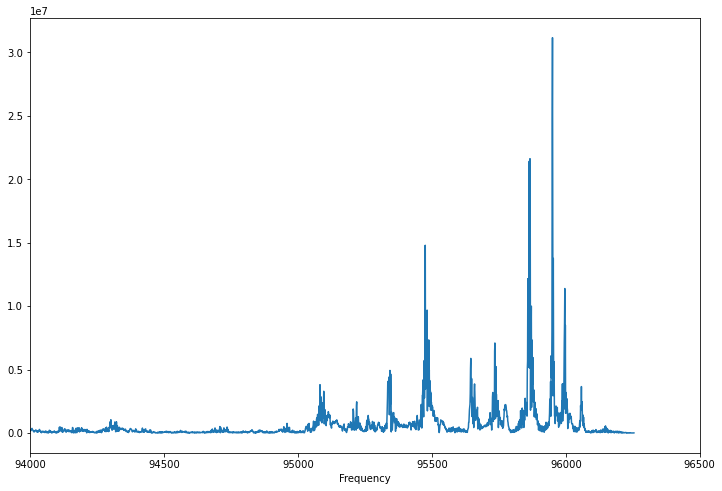

In [29]:
plt.figure(figsize= (12, 8))
plt.xlabel('Frequency')
plt.xlim((94000, 96500))
plt.plot(np.abs(signal_combined_fft))
plt.savefig('plots/DFT_combined_highs.png');

Single notes

In [30]:
signal_do_fft = fft.fft(signals_df.signal[0])

In [31]:
signal_mi_fft = fft.fft(signals_df.signal[1])

In [32]:
signal_szo_fft = fft.fft(signals_df.signal[2])

In [33]:
signal_ti_fft = fft.fft(signals_df.signal[3])

Visualize single notes in terms of frequencies

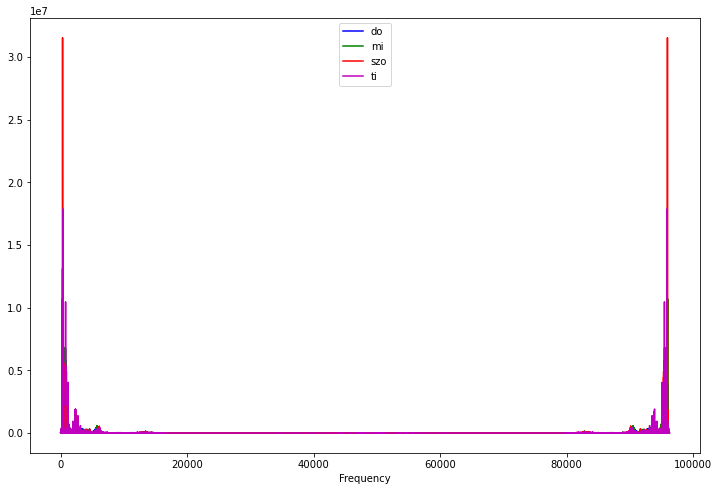

In [34]:
plt.figure(figsize= (12, 8))
plt.xlabel('Frequency')
plt.plot(np.abs(signal_do_fft), 'b', label= 'do')
plt.plot(np.abs(signal_mi_fft), 'g', label= 'mi')
plt.plot(np.abs(signal_szo_fft), 'r', label= 'szo')
plt.plot(np.abs(signal_ti_fft), 'm', label= 'ti')
plt.legend();

Zoom in on above graph

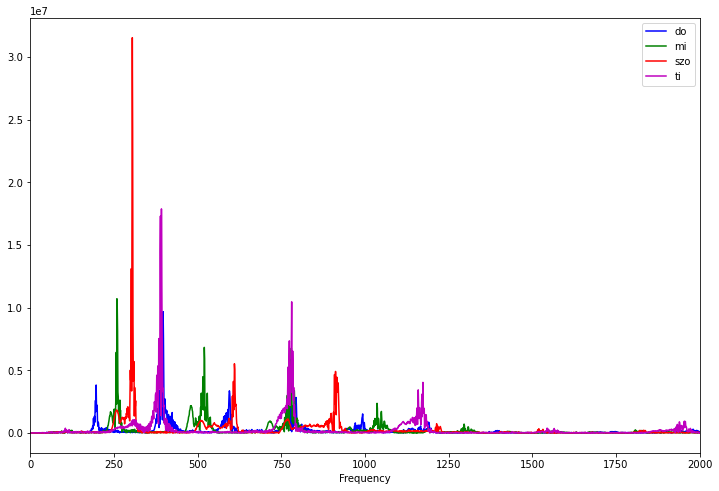

In [35]:
plt.figure(figsize= (12, 8))
plt.xlabel('Frequency')
plt.xlim((0, 2000))
plt.plot(np.abs(signal_do_fft), 'b', label= 'do')
plt.plot(np.abs(signal_mi_fft), 'g', label= 'mi')
plt.plot(np.abs(signal_szo_fft), 'r', label= 'szo')
plt.plot(np.abs(signal_ti_fft), 'm', label= 'ti')
plt.legend()
plt.savefig('plots/DFT_individuals_lows.png');

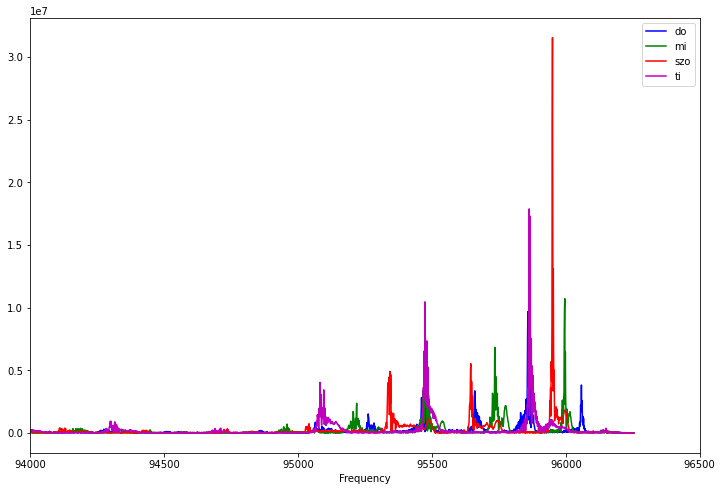

In [36]:
plt.figure(figsize= (12, 8))
plt.xlabel('Frequency')
plt.xlim((94000, 96500))
plt.plot(np.abs(signal_do_fft), 'b', label= 'do')
plt.plot(np.abs(signal_mi_fft), 'g', label= 'mi')
plt.plot(np.abs(signal_szo_fft), 'r', label= 'szo')
plt.plot(np.abs(signal_ti_fft), 'm', label= 'ti')
plt.legend()
plt.savefig('plots/DFT_individuals_highs.png');